In [1]:
import pandas as pd
from pandas import read_excel
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from string import ascii_letters
import seaborn as sns

In [2]:
data = read_excel("monthly_data.xlsx")
dfa = pd.read_excel (r'monthly_data.xlsx')

print(type(data))
print(type(dfa))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
print(data.head())

      year  max_temp  min_temp  rainfall(mm)  humidity  dengue  Leptospirosis
0  2014-01      32.8      22.2         0.000     67.75       1              0
1  2014-02      32.8      22.8         7.650     71.25       0              0
2  2014-03      34.1      24.2        27.670     72.37       0              0
3  2014-04      34.3      25.7       100.375     77.25       5              0
4  2014-05      33.9      25.3       290.120     79.12      28              0


In [4]:
print(data.tail())

       year  max_temp  min_temp  rainfall(mm)  humidity  dengue  Leptospirosis
55  2018-08      29.7      23.9        1010.2     86.87      35             16
56  2018-09      30.9      24.5         434.2     79.28      42             32
57  2018-10      31.2      24.7         208.2     81.12       4              7
58  2018-11      31.2      24.5         114.2     80.72       2              3
59  2018-12      31.6      23.3          56.3     77.13       2              1


In [6]:
print(data.dtypes)

year              object
max_temp         float64
min_temp         float64
rainfall(mm)     float64
humidity         float64
dengue             int64
Leptospirosis      int64
dtype: object


In [10]:
#data.isnull()
data.isnull().sum()

year             0
max_temp         0
min_temp         0
rainfall(mm)     0
humidity         0
dengue           0
Leptospirosis    0
dtype: int64

In [9]:
#data.isnull().sum().sum()
data.isnull().values.any()

False

In [11]:
data.isnull().sum().sum()

0

In [12]:
data.iloc[:, 1:].describe()

,max_temp,min_temp,rainfall(mm),humidity,dengue,Leptospirosis
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,31.925000,24.608333,255.480833,79.218167,31.233333,8.166667
std,1.236401,0.917493,254.636087,5.465706,53.062281,12.460333
min,29.400000,22.200000,0.000000,67.750000,0.000000,0.000000
25%,31.075000,24.200000,35.775000,75.000000,2.000000,0.000000
50%,31.700000,24.500000,208.780000,79.620000,11.000000,1.000000
75%,32.825000,24.800000,406.002500,84.387500,38.750000,12.500000
max,34.800000,27.400000,1010.200000,88.125000,249.000000,48.000000


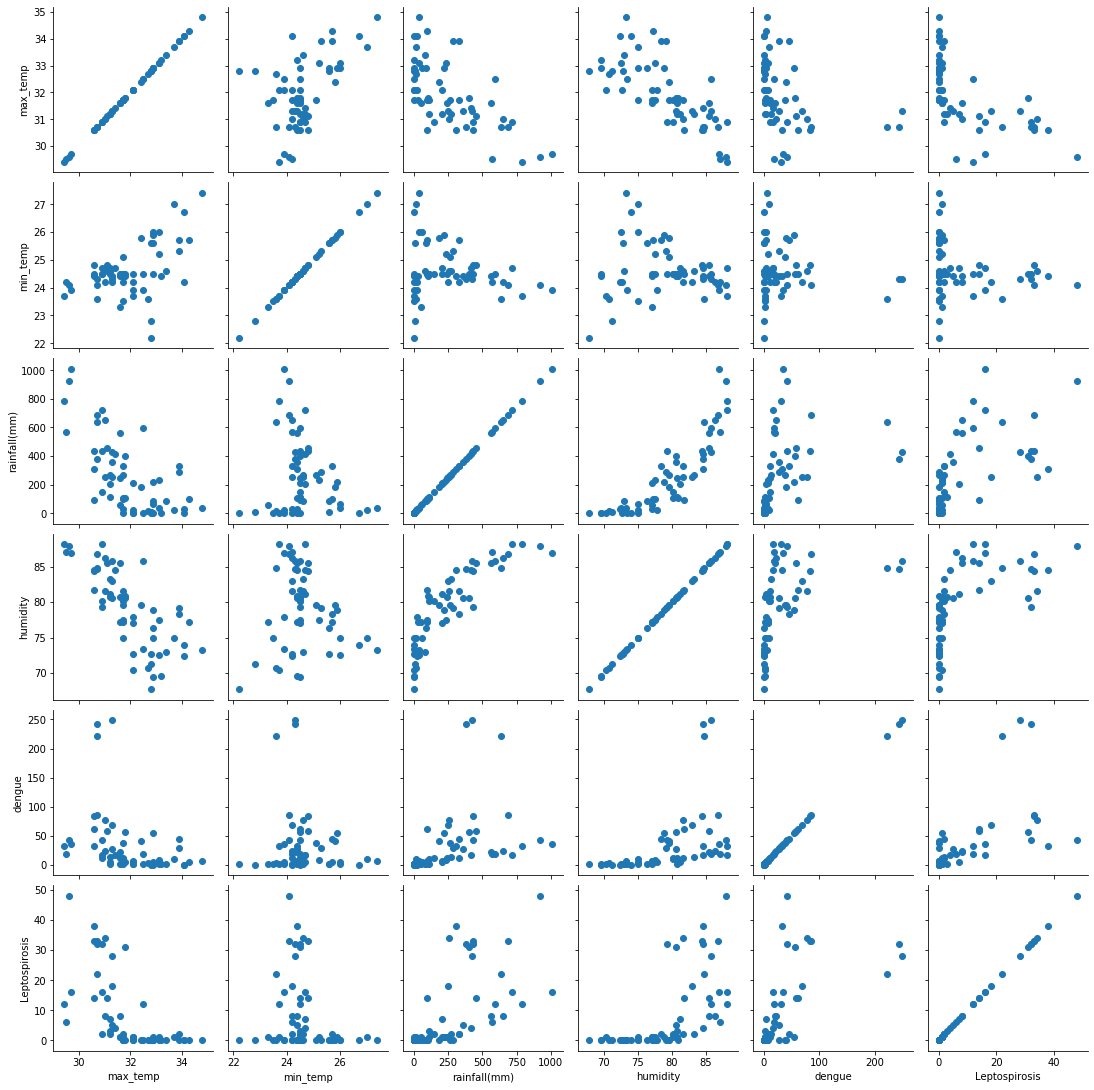

In [16]:
g = sns.PairGrid(data)
g.map(plt.scatter)

In [24]:
#g = sns.PairGrid(data)
#g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter);

In [23]:
#g = sns.PairGrid(data, vars=["rainfall(mm)", "dengue"])
#g.map(plt.scatter);

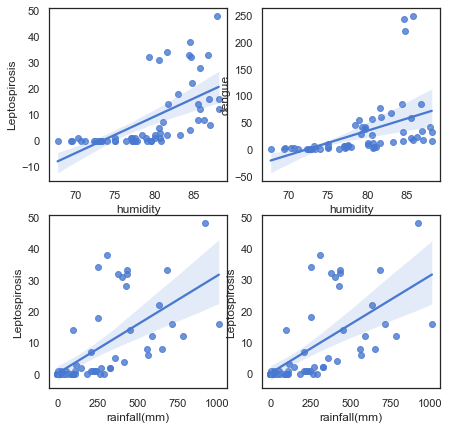

In [68]:
fig, axs = plt.subplots(2, 2, clear=True, figsize=(7, 7))
sns.regplot(x='humidity', y='Leptospirosis', data=data, ax=axs[0, 0])
sns.regplot(x='humidity', y='dengue', data=data, ax=axs[0, 1])
sns.regplot(x='rainfall(mm)',y='Leptospirosis',data=data, ax=axs[1, 0])
sns.regplot(x='rainfall(mm)',y='Leptospirosis',data=data, ax=axs[1, 1])

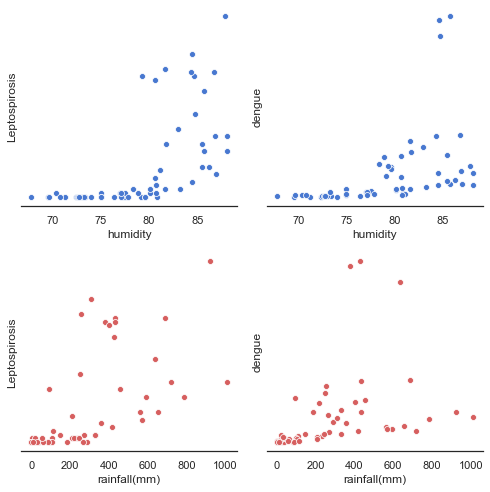

In [49]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.despine(left=True)

sns.scatterplot(x='humidity', y='Leptospirosis', data=data, color="b", ax=axes[0, 0])
sns.scatterplot(x='humidity', y='dengue', data=data, color="b", ax=axes[0, 1])
sns.scatterplot(x='rainfall(mm)', y='Leptospirosis', data=data, color="r", ax=axes[1, 0])
sns.scatterplot(x='rainfall(mm)', y='dengue', data=data, color="r", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

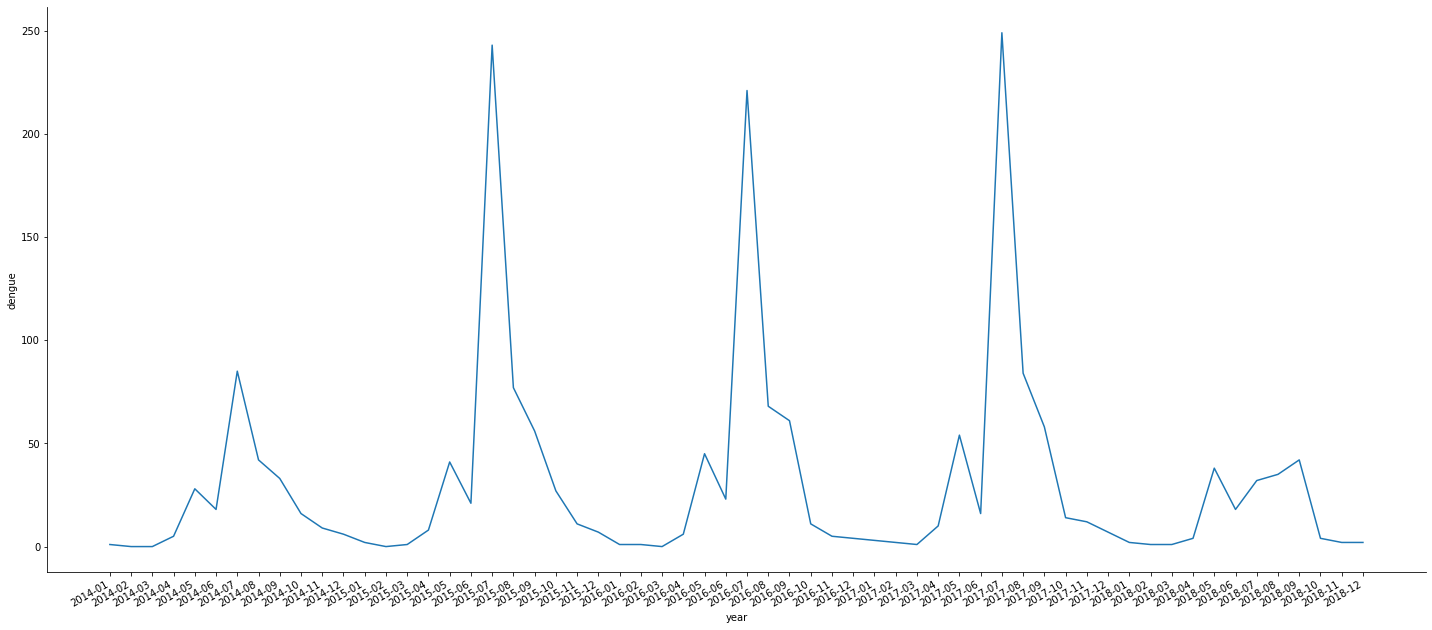

In [13]:
g = sns.relplot(x="year", y="dengue", kind="line", data=data, height=10, aspect=2)
g.fig.autofmt_xdate()

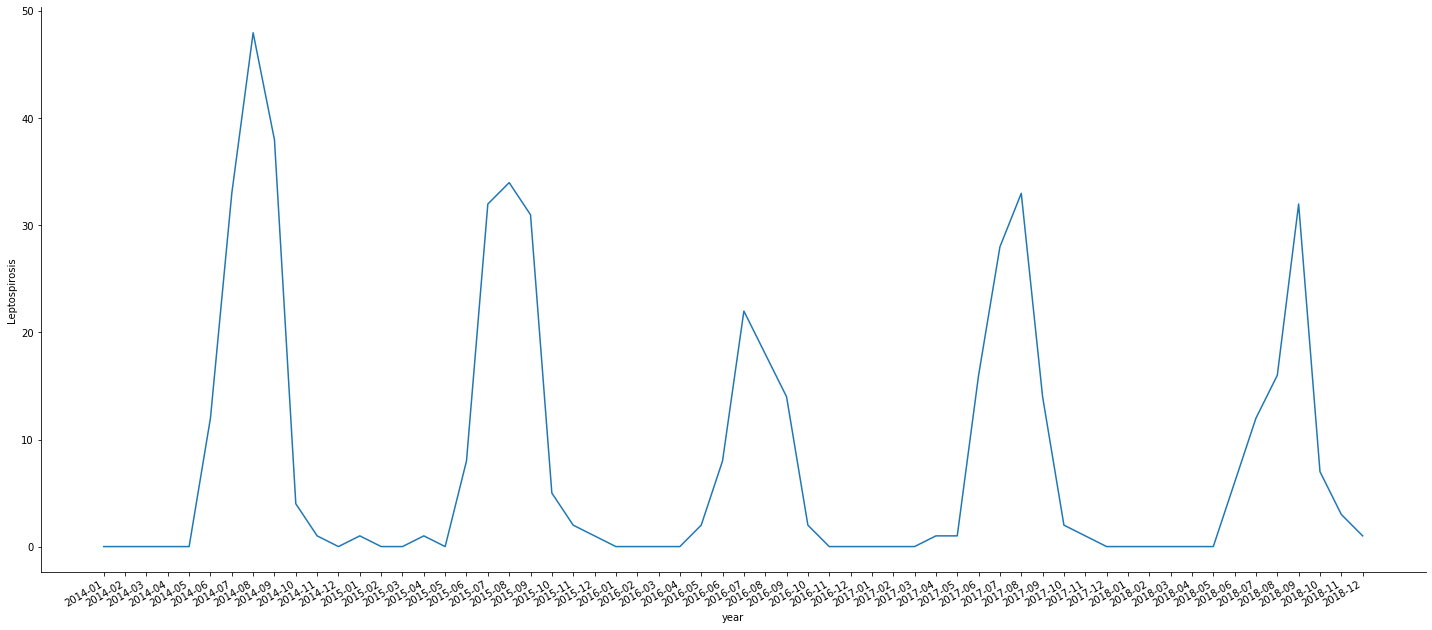

In [14]:
g = sns.relplot(x="year", y="Leptospirosis", kind="line", data=data, height=10, aspect=2)
g.fig.autofmt_xdate()

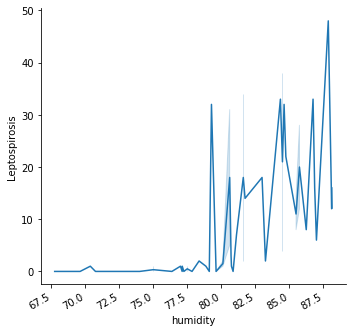

In [17]:
g = sns.relplot(x="humidity", y="Leptospirosis", kind="line", data=data, height=5, aspect=1)
g.fig.autofmt_xdate()

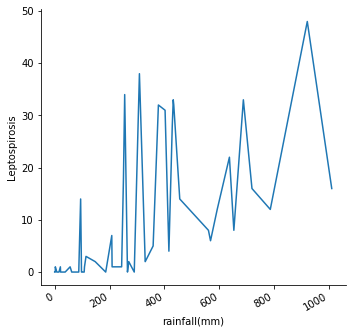

In [18]:
g = sns.relplot(x="rainfall(mm)", y="Leptospirosis", kind="line", data=data, height=5, aspect=1)
g.fig.autofmt_xdate()

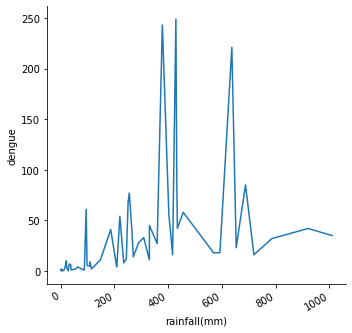

In [19]:
g = sns.relplot(x="rainfall(mm)", y="dengue", kind="line", data=data, height=5, aspect=1)
g.fig.autofmt_xdate()

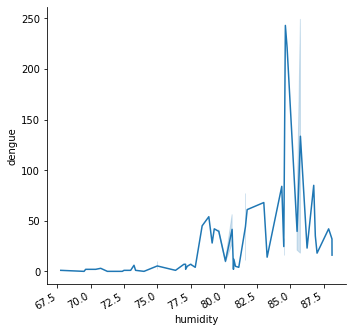

In [20]:
g = sns.relplot(x="humidity", y="dengue", kind="line", data=data, height=5, aspect=1)
g.fig.autofmt_xdate()

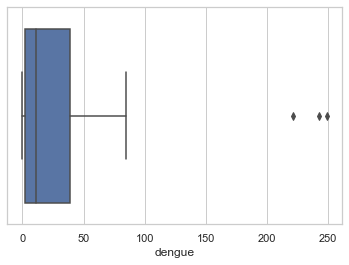

In [24]:
sns.set(style="whitegrid")
sns.boxplot(x="dengue", data=data)

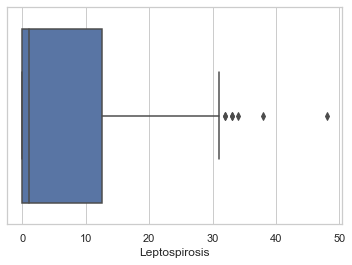

In [25]:
sns.boxplot(x="Leptospirosis", data=data)

## correlation matrix

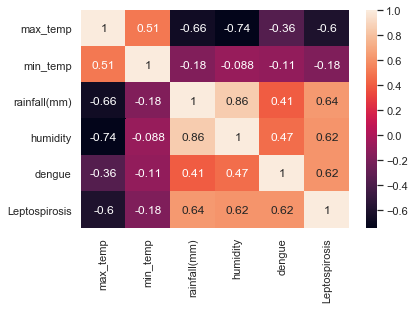

In [77]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

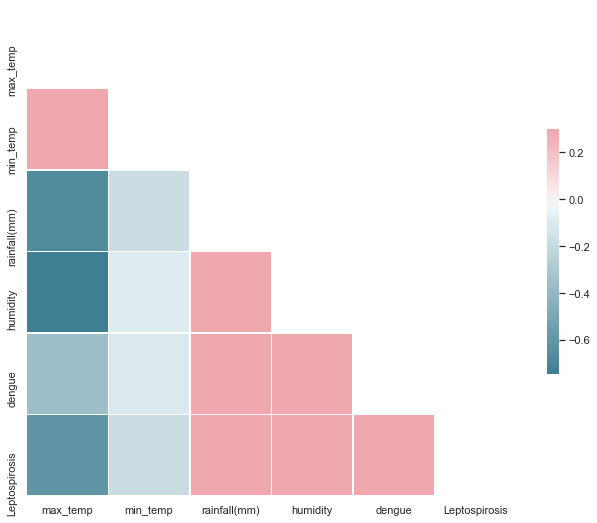

In [78]:
sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),columns=list(ascii_letters[26:]))


# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})